In [40]:
from keras.applications.vgg16 import VGG16

# Load the model
model = VGG16()

In [41]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

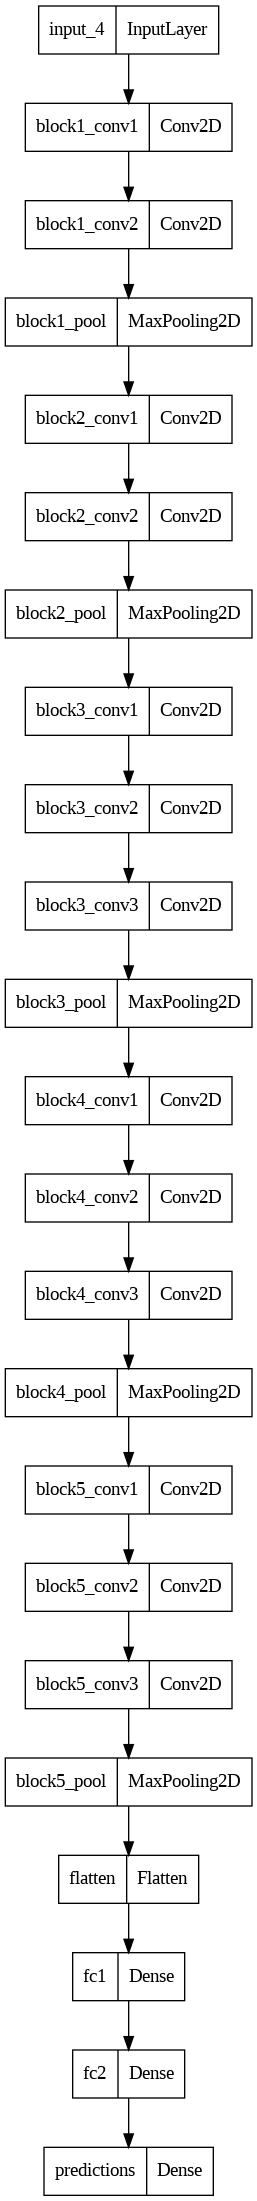

In [42]:
from keras.utils import plot_model
plot_model(model)

In [43]:
model.layers

In [44]:
for i in range(len(model.layers)):
   #check the convolutional layer
   if 'conv' not in model.layers[i].name:
    continue
  # get filters weights
   filters, biases = model.layers[i].get_weights()
   print("layer number",i,model.layers[i].name, filters.shape)


layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [45]:
# retrive weights from the second hidden layer
filters, bias = model.layers[1].get_weights()

In [46]:
filters,bias

(array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [47]:
# normalize filter values to 0-1 so we can viusalize them

f_min, f_max = filters.min(), filters.max()

filters = (filters - f_min) / (f_max -f_min)

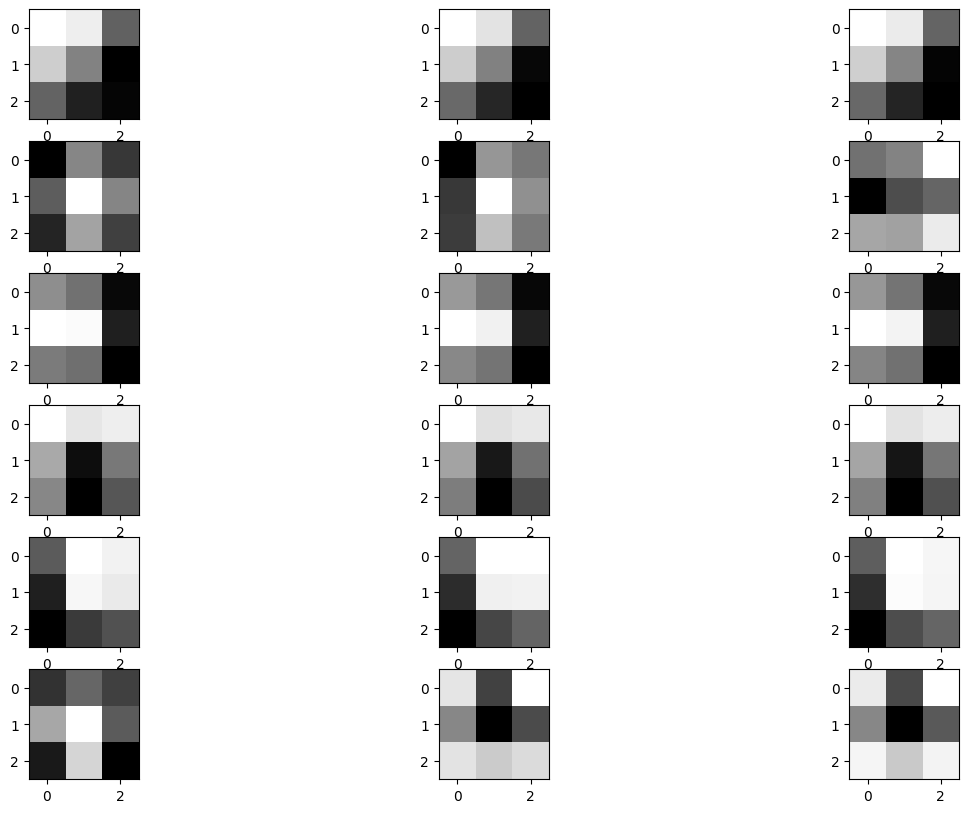

In [48]:
import matplotlib.pyplot as plt

# Set the number of filters to visualize
n_filters = 6

# Initialize the index for subplot positions
ix = 1

# Create a figure for plotting with specified size (width=15 inches, height=10 inches)
fig = plt.figure(figsize=(15,10))

# Loop through each filter
for i in range(n_filters):
    # Extract the i-th filter from the filters array
    # Assuming filters is a 4D array: (height, width, channels, number_of_filters)
    f = filters[:,:,:,i]

    # Loop through each channel of the filter (assuming 3 channels: Red, Green, Blue)
    for j in range(3):
        # Create a subplot in a grid of (n_filters rows x 3 columns)
        # ix determines the position of the current subplot
        plt.subplot(n_filters, 3, ix)

        # Display the j-th channel of the filter in grayscale
        plt.imshow(f[:,:,j], cmap='gray')

        # Increment the subplot index for the next position
        ix += 1

# Display the figure with all the subplots
plt.show()


In [49]:
from tensorflow.keras.models import Model

In [50]:
model = Model(inputs = model.inputs, outputs = model.layers[1].output)

In [51]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the image with the specified target size
image = load_img("/content/images.jfif", target_size=(224, 224))

# Convert the image to an array
image = img_to_array(image)

# Expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

# Preprocess the image for the model (specific to VGG16 or similar models)
image = preprocess_input(image)

# Now 'image' is ready to be fed into your model
print(image.shape)


(1, 224, 224, 3)


1/1 [==============================] - 0s 462ms/step


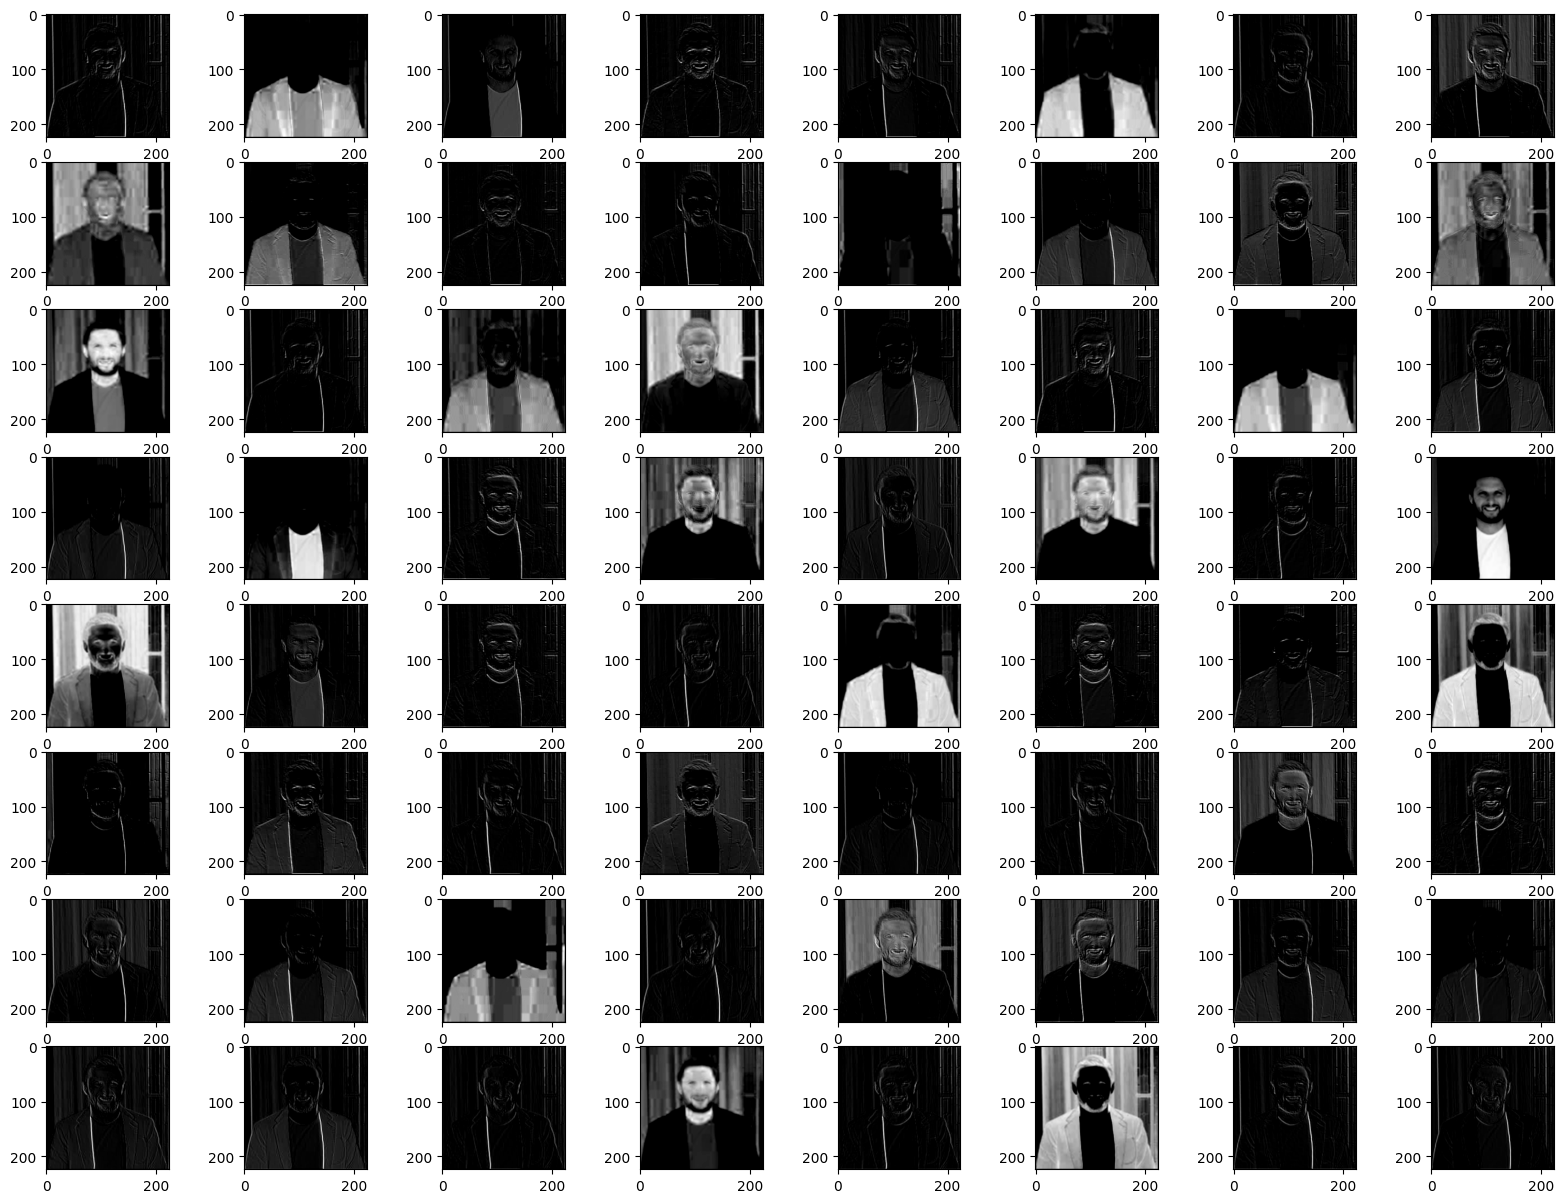

In [52]:
# Calculating the feature maps using the model's prediction on the preprocessed image
features = model.predict(image)

# Create a figure for plotting with specified size (width=20 inches, height=15 inches)
fig = plt.figure(figsize=(20,15))

# Loop through each feature map
# features.shape[3] is the number of feature maps
for i in range(1, features.shape[3] + 1):

    # Create a subplot in an 8x8 grid
    # i is the position of the current subplot
    plt.subplot(8, 8, i)

    # Display the i-th feature map in grayscale
    # features[0, :, :, i-1] extracts the (i-1)-th feature map from the batch
    plt.imshow(features[0, :, :, i-1], cmap='gray')

# Display the figure with all the subplots
plt.show()


In [53]:
model2 = VGG16()

In [54]:
# Define a list of layer indices whose outputs we want to extract
layer_index = [2, 5, 9, 13, 17]

# Get the outputs of the specified layers from the model
# model2.layers[i].output gets the output of the i-th layer
outputs = [model2.layers[i].output for i in layer_index]

# Create a new model that has the same inputs as the original model (model2)
# but outputs the activations of the specified layers
model3 = Model(inputs=model2.inputs, outputs=outputs)


1/1 [==============================] - 1s 662ms/step


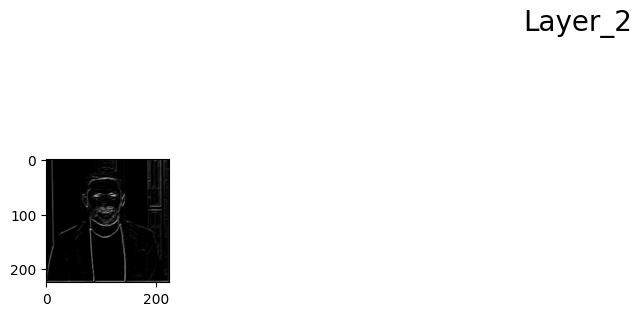

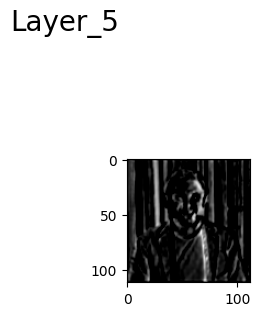

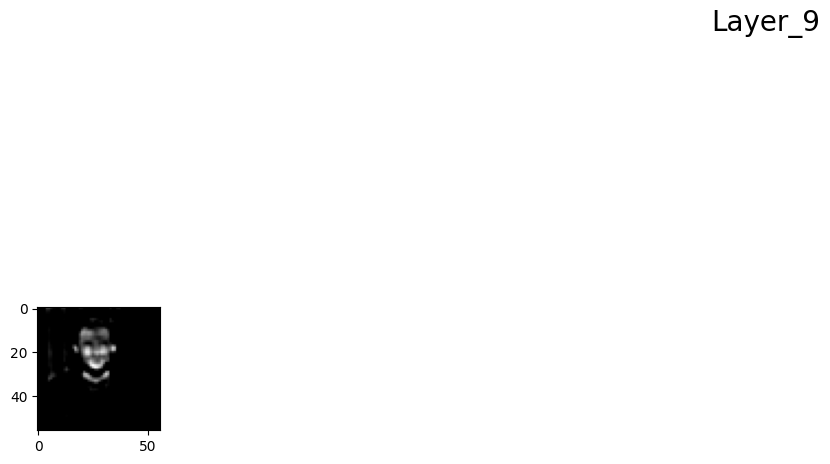

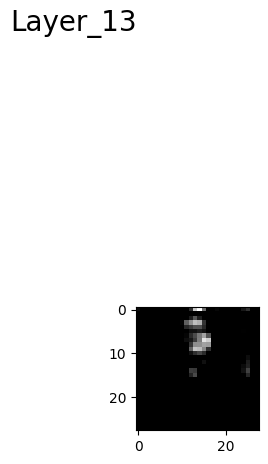

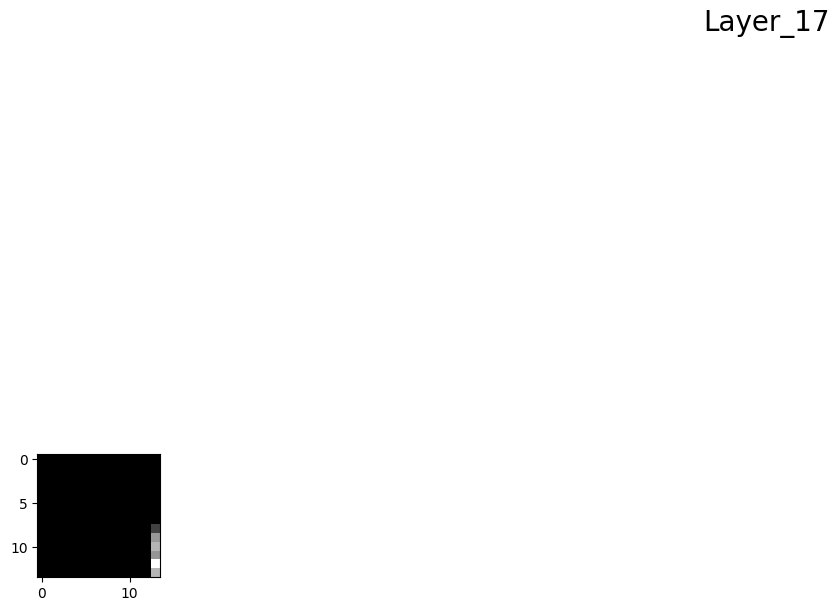

In [55]:
# Use model3 to predict the feature maps from the preprocessed image
# model3 outputs the activations from the specified layers in layer_index
feature_map = model3.predict(image)

# Loop through each layer index and its corresponding feature map
for i, fmap in zip(layer_index, feature_map):
    # Create a new figure for plotting with a specified size (width=20 inches, height=15 inches)
    fig = plt.figure(figsize=(20, 15))

    # Add a title to the figure indicating which layer's feature map is being visualized
    fig.suptitle("Layer_{}".format(i), fontsize=20)

    # Loop through each feature map channel
    # fmap.shape[3] is the number of feature map channels
    for j in range(1, fmap.shape[3] + 1):
        # Create a subplot in an 8x8 grid
        # j is the position of the current subplot
        plt.subplot(8, 8, i)

        # Display the j-th feature map channel in grayscale
        # fmap[0, :, :, j-1] extracts the (j-1)-th feature map channel from the batch
        plt.imshow(fmap[0, :, :, j-1], cmap='gray')

# Display the figure with all the subplots
plt.show()
